In [9]:
# use this link to get the data from drop box
!wget https://www.dropbox.com/s/0vfia2umnxnjbn7/COVID-19_Radiography_Dataset.zip?dl=0


--2023-01-04 14:46:53--  https://www.dropbox.com/s/0vfia2umnxnjbn7/COVID-19_Radiography_Dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/0vfia2umnxnjbn7/COVID-19_Radiography_Dataset.zip [following]
--2023-01-04 14:46:54--  https://www.dropbox.com/s/raw/0vfia2umnxnjbn7/COVID-19_Radiography_Dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0c5311f14a803384abde4fc6fc.dl.dropboxusercontent.com/cd/0/inline/Bz70MWWtlbTx8J8bCE3BDYPciQ6cEhxuMoKLBlflMjgODy0T3C7T2pNOj5kHuz1Xj3YBDAigk6hVMoIfCyZGa69mZ0XGqneyd6Xc3zxIpaffnSGPIhKGCKGlD93wXKwEoGJpA4U34zX1jjQ46sMA3HJg_VmtS22T1gcVxRykb-Ms8g/file# [following]
--2023-01-04 14:46:54--  https://uc0c5311f14a803384abde4fc6fc.dl.dropboxusercontent.com/cd/0/inline/Bz70MWWtlbTx8J8

In [10]:
# add the path where you have saved the data set i.e the zip file
!unzip "/content/COVID-19_Radiography_Dataset.zip?dl=0"


串流輸出內容已截斷至最後 5000 行。
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7925.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7926.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7927.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7928.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7929.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-793.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7930.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7931.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7932.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7933.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7934.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7935.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7936.png  
  inflating: COVID-19_Radiograp

In [11]:
import pandas as pd
import numpy as np
import os
import shutil
import glob
import matplotlib.pyplot as plt


In [12]:
covid_imgs = pd.read_excel("./COVID-19_Radiography_Dataset/COVID.metadata.xlsx")
covid_imgs.head(2)


,FILE NAME,FORMAT,SIZE,URL
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...


In [13]:
opacity_images = pd.read_excel("./COVID-19_Radiography_Dataset/Lung_Opacity.metadata.xlsx")
opacity_images.head(2)


,FILE NAME,FORMAT,SIZE,URL
0,Lung_Opacity-1,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
1,Lung_Opacity-2,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...


In [14]:
normal_images = pd.read_excel("./COVID-19_Radiography_Dataset/Normal.metadata.xlsx")
normal_images.head(2)


,FILE NAME,FORMAT,SIZE,URL
0,NORMAL-1,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
1,NORMAL-2,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...


In [15]:
pneumonia_images = pd.read_excel("./COVID-19_Radiography_Dataset/Viral Pneumonia.metadata.xlsx")
pneumonia_images.head(2)


,FILE NAME,FORMAT,SIZE,URL
0,Viral Pneumonia-1,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
1,Viral Pneumonia-2,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...


In [16]:
ROOT_DIR = "/content/COVID-19_Radiography_Dataset/"
imgs = ['COVID','Lung_Opacity','Normal','Viral Pneumonia']

NEW_DIR = "/content/all_images/"
     
# Copy all my images to a new folder i.e all_images
if not os.path.exists(NEW_DIR):
  os.mkdir(NEW_DIR)

  for img in imgs:
    org_dir = os.path.join(ROOT_DIR, img+"/")
    for imgfile in glob.glob(os.path.join(org_dir, "images/*.png")):
      shutil.copy(imgfile, NEW_DIR)
    for imgfile in glob.glob(os.path.join(org_dir, "masks/*.png")):
      shutil.copy(imgfile, NEW_DIR)
      
else:
  print("Already Exist")

In [17]:
# Now lets visualize the number of Images in each categories
counter = {'COVID':0,'Lung_Opacity':0,'Normal':0,'Viral Pneumonia':0}

for image in imgs:
  for count in glob.iglob(NEW_DIR+image+"*"):
    counter[image] += 1

# the number of images i have in each class
counter


{'COVID': 3616, 'Lung_Opacity': 6012, 'Normal': 10192, 'Viral Pneumonia': 1345}

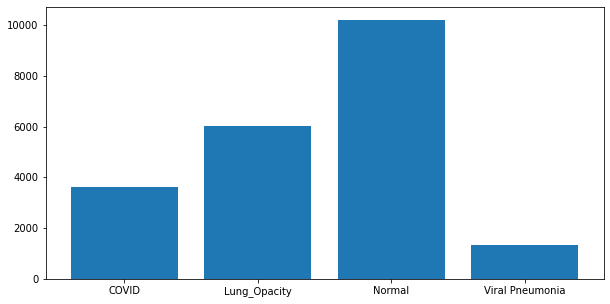

In [18]:
#visualizing the number of images 
plt.figure(figsize=(10,5))
plt.bar(x = counter.keys(), height= counter.values())
plt.show()

In [19]:
if not os.path.exists(NEW_DIR+"train_test_split/"):

  os.makedirs(NEW_DIR+"train_test_split/")

  os.makedirs(NEW_DIR+"train_test_split/train/Normal")
  os.makedirs(NEW_DIR+"train_test_split/train/Covid")

  os.makedirs(NEW_DIR+"train_test_split/test/Normal")
  os.makedirs(NEW_DIR+"train_test_split/test/Covid")

  os.makedirs(NEW_DIR+"train_test_split/validation/Normal")
  os.makedirs(NEW_DIR+"train_test_split/validation/Covid")

  # Train Data
  for i in np.random.choice(replace= False , size= 3000 , a = glob.glob(NEW_DIR+imgs[0]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/train/Covid" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 3900 , a = glob.glob(NEW_DIR+imgs[2]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/train/Normal" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 900 , a = glob.glob(NEW_DIR+imgs[3]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/train/Covid" )
    os.remove(i)

  # Validation Data
  for i in np.random.choice(replace= False , size= 308 , a = glob.glob(NEW_DIR+imgs[0]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/validation/Covid" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 500 , a = glob.glob(NEW_DIR+imgs[2]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/validation/Normal" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 200 , a = glob.glob(NEW_DIR+imgs[3]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/validation/Covid" )
    os.remove(i)

  # Test Data
  for i in np.random.choice(replace= False , size= 300 , a = glob.glob(NEW_DIR+imgs[0]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/test/Covid" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 300 , a = glob.glob(NEW_DIR+imgs[2]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/test/Normal" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 200 , a = glob.glob(NEW_DIR+imgs[3]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/test/Covid" )
    os.remove(i)


In [20]:
train_path  = "/content/all_images/train_test_split/train"
valid_path  = "/content/all_images/train_test_split/validation"
test_path   = "/content/all_images/train_test_split/test"


In [21]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import vgg16
from keras.models import Model
from keras.layers import Dense, MaxPool2D, Conv2D
import keras


In [22]:
train_data_gen = ImageDataGenerator(preprocessing_function= vgg16.preprocess_input , zoom_range= 0.2, horizontal_flip= True, shear_range= 0.2 , rescale= 1./255)
train = train_data_gen.flow_from_directory(directory= train_path , target_size=(224,224))

Found 7800 images belonging to 2 classes.


In [23]:
validation_data_gen = ImageDataGenerator(preprocessing_function= vgg16.preprocess_input , rescale= 1./255 )
valid = validation_data_gen.flow_from_directory(directory= valid_path , target_size=(224,224))


Found 1008 images belonging to 2 classes.


In [24]:
test_data_gen = ImageDataGenerator(preprocessing_function= vgg16.preprocess_input, rescale= 1./255 )
test = train_data_gen.flow_from_directory(directory= test_path , target_size=(224,224), shuffle= False)


Found 800 images belonging to 2 classes.


In [25]:
train.class_indices

{'Covid': 0, 'Normal': 1}

In [26]:
class_type = {0:'Covid',  1 : 'Normal'}

In [27]:
t_img , label = train.next()

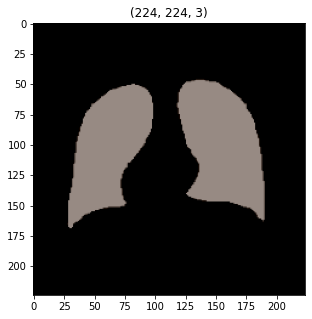

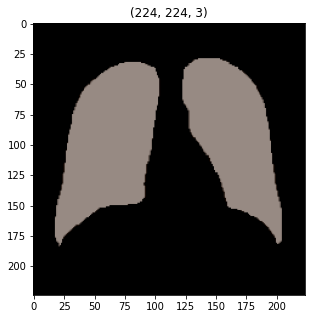

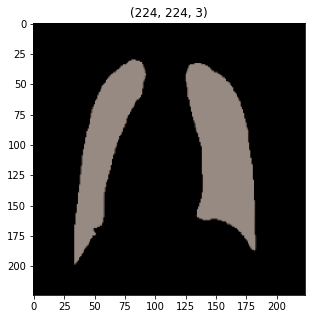

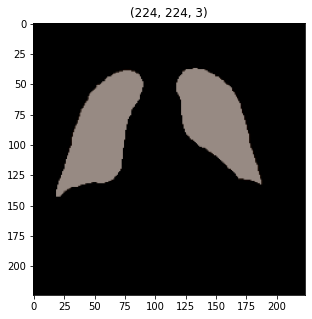

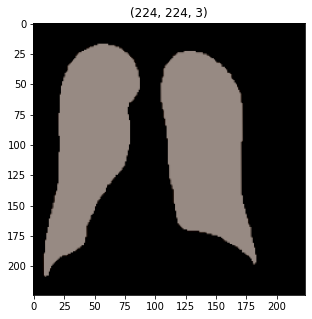

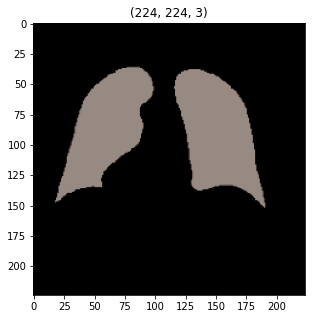

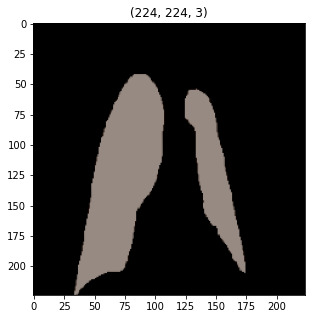

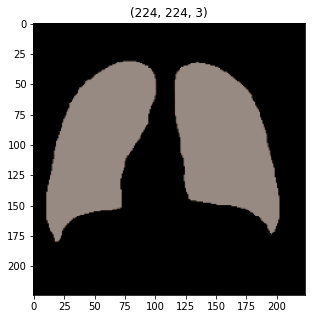

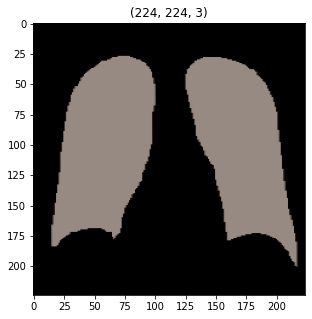

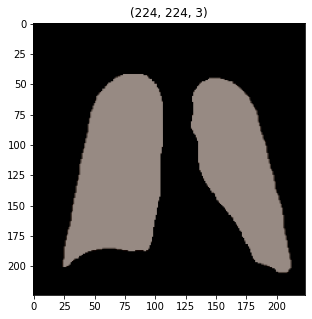

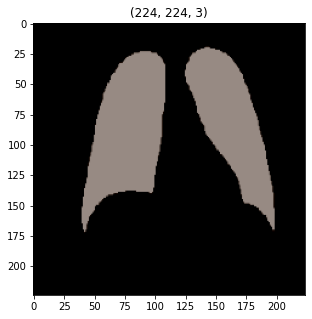

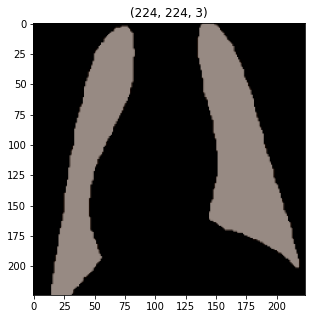

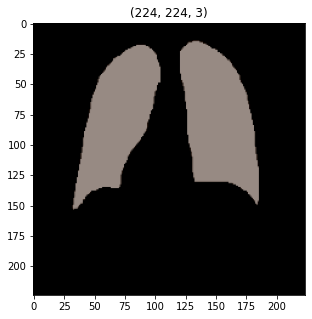

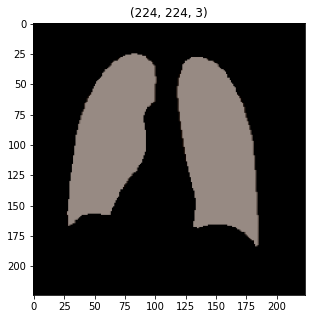

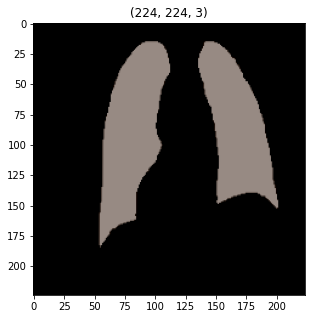

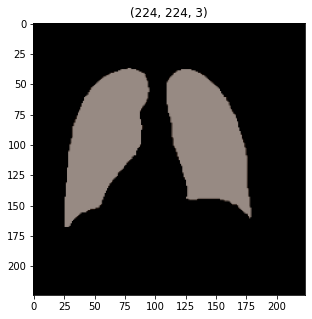

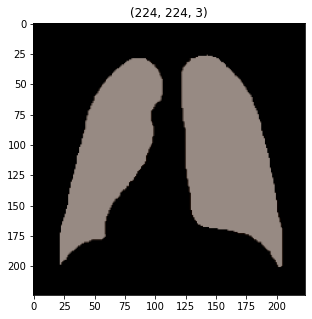

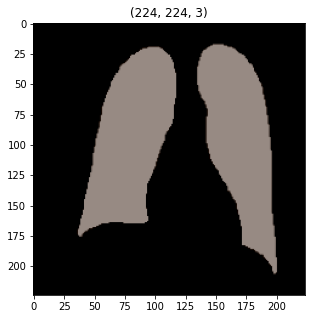

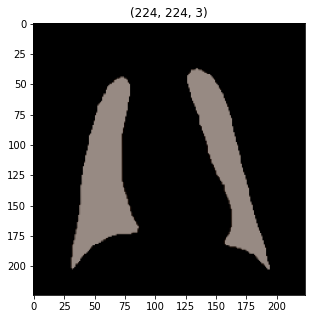

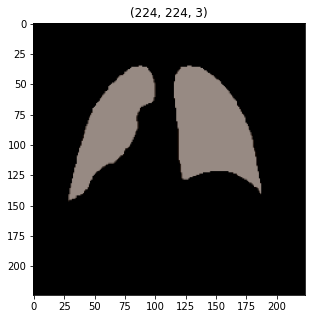

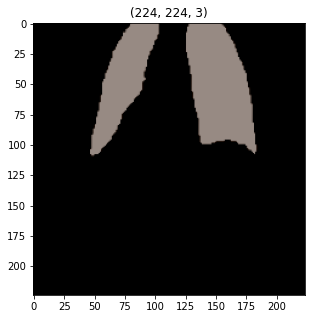

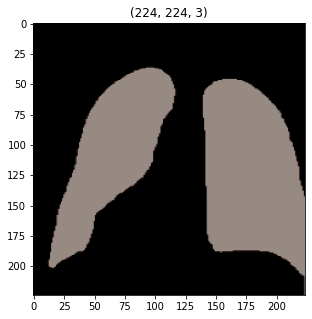

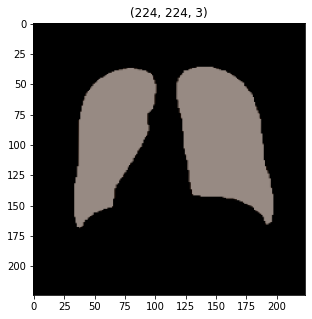

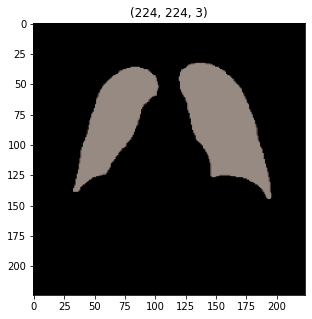

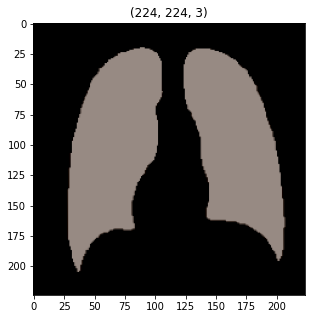

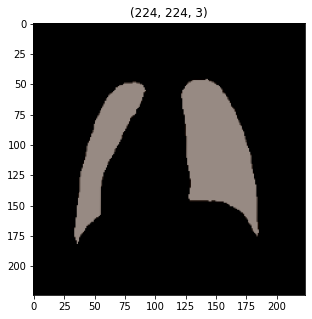

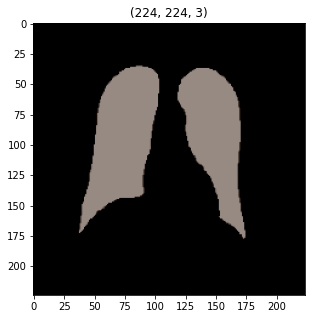

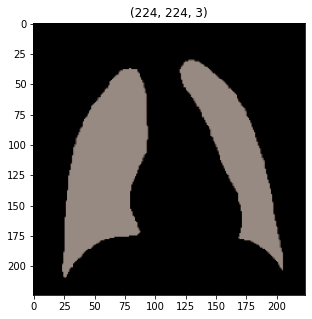

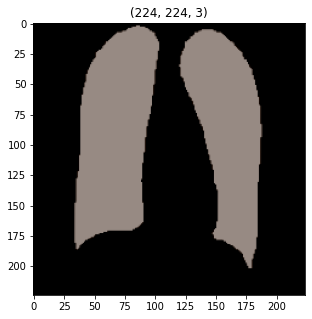

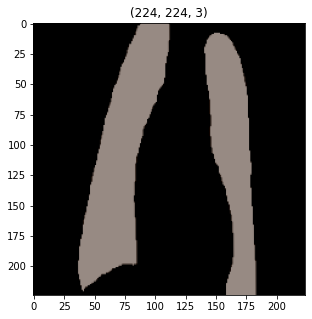

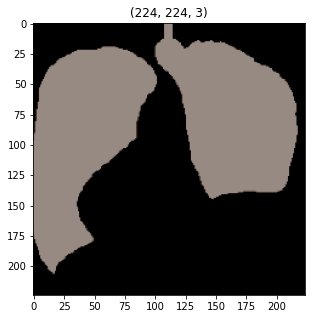

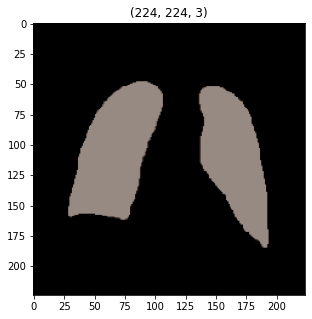

In [28]:
# function when called will prot the images 
def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """

  for im, l in zip(img_arr,label) :
    plt.figure(figsize= (5,5))
    plt.imshow(im, cmap = 'gray')
    plt.title(im.shape)
    plt.axis = False
    plt.show()

# function call to plot the images 
plotImages(t_img, label)


In [29]:
from keras.applications.vgg16 import VGG16
from keras.layers import Flatten , Dense, Dropout , MaxPool2D
     

In [30]:
vgg = VGG16( input_shape=(224,224,3), include_top= False) # include_top will consider the new weights

58889256/58889256 [==============================] - 0s 0us/step


In [31]:
for layer in vgg.layers:           # Dont Train the parameters again 
  layer.trainable = False

In [32]:
x = Flatten()(vgg.output)
x = Dense(units=2 , activation='sigmoid', name = 'predictions' )(x)

model = Model(vgg.input, x)

In [33]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [34]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [35]:
# implementing early stopping and model check point 

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor= "val_accuracy" , min_delta= 0.01, patience= 3, verbose=1)
mc = ModelCheckpoint(filepath="bestmodel.h5", monitor="val_accuracy", verbose=1, save_best_only= True)

In [36]:
#hist = model.fit_generator(train, steps_per_epoch= 10, epochs= 8, validation_data= valid , validation_steps= 32)
hist = model.fit_generator(train, steps_per_epoch= 10, epochs= 30, validation_data= valid , validation_steps= 32, callbacks=[es,mc])

<ipython-input-36-4373e4f0ccc9>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train, steps_per_epoch= 10, epochs= 30, validation_data= valid , validation_steps= 32, callbacks=[es,mc])


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 1.6415 - accuracy: 0.4563
Epoch 1: val_accuracy improved from -inf to 0.50496, saving model to bestmodel.h5
10/10 [==============================] - 21s 1s/step - loss: 1.6415 - accuracy: 0.4563 - val_loss: 1.0109 - val_accuracy: 0.5050
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 0.9296 - accuracy: 0.5562
Epoch 2: val_accuracy improved from 0.50496 to 0.69246, saving model to bestmodel.h5
10/10 [==============================] - 8s 881ms/step - loss: 0.9296 - accuracy: 0.5562 - val_loss: 0.6049 - val_accuracy: 0.6925
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 0.5754 - accuracy: 0.7031
Epoch 3: val_accuracy improved from 0.69246 to 0.74901, saving model to bestmodel.h5
10/10 [==============================] - 8s 885ms/step - loss: 0.5754 - accuracy: 0.7031 - val_loss: 0.5503 - val_accuracy: 0.7490
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 0.5145 

In [37]:
## load only the best model 
from keras.models import load_model
model = load_model("bestmodel.h5")
     

In [38]:
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

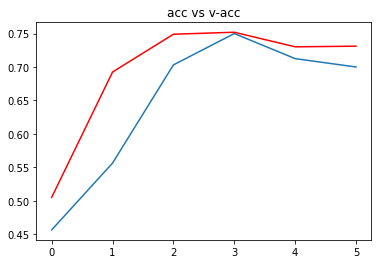

In [39]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

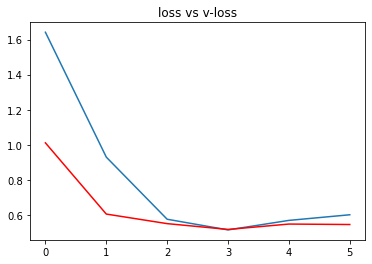

In [40]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [41]:
# checking out the accurscy of our model 

acc = model.evaluate_generator(generator= test)[1] 

print(f"The accuracy of your model is = {acc} %")
     

<ipython-input-41-30c7d0d054af>:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model.evaluate_generator(generator= test)[1]


The accuracy of your model is = 0.7225000262260437 %


In [42]:
from keras.preprocessing import image

def get_img_array(img_path):
  """
  Input : Takes in image path as input 
  Output : Gives out Pre-Processed image
  """
  path = img_path
  img = image.load_img(path, target_size=(224,224,3))
  img = image.img_to_array(img)/255
  img = np.expand_dims(img , axis= 0 )
  
  return img

In [45]:
import tensorflow as tf

In [46]:
# this function is udes to generate the heat map of aan image


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [47]:
import matplotlib.cm as cm

from IPython.display import Image, display

In [48]:
# put the heatmap to our image to understand the area of interest

def save_and_display_gradcam(img_path , heatmap, cam_path="cam.jpg", alpha=0.4):
    """
    img input shoud not be expanded 
    """

    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    
    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))

In [53]:
# function that is used to predict the image type and the ares that are affected by covid


def image_prediction_and_visualization(path,last_conv_layer_name = "block5_conv3", model = model):
  """
  input:  is the image path, name of last convolution layer , model name
  output : returs the predictions and the area that is effected
  """
  
  
  
  img_array = get_img_array(path)

  heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

  img = get_img_array(path)

  res = class_type[np.argmax(model.predict(img))]
  print(f"The given X-Ray image is of type = {res}")
  print()
  print(f"The chances of image being Covid is : {model.predict(img)[0][0]*100} %")
  print(f"The chances of image being Normal is : {model.predict(img)[0][1]*100} %")

  print()
  print("image with heatmap representing the covid spot")

  # function call
  save_and_display_gradcam(path, heatmap)

  print()
  print("the original input image")
  print()

  a = plt.imread(path)
  plt.imshow(a, cmap = "gray")
  plt.title("Original image")
  plt.show()